# Capstone 2 - Modeling 
**By Janzen Hui**  </br></br>
**BrainStation Data Science - January 2022** </br></br>

**Project:** Predicting California's Wildfire</br>
**Current Notebook:** Capstone 2 - Modeling </br>
**Previous Notebook:** Capstone 1 - Data Wrangling</br>

This Jupyter notebook will be used to model and predict for the occurrence of large fires within California. The machine learning models will include logistic regression, decision trees, random forests and XGBoost.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Capstone-2---Modeling" data-toc-modified-id="Capstone-2---Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Capstone 2 - Modeling</a></span></li><li><span><a href="#Import-Relevant-Libraries-and-Dataset" data-toc-modified-id="Import-Relevant-Libraries-and-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Relevant Libraries and Dataset</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Modeling-Set-Up" data-toc-modified-id="Modeling-Set-Up-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling Set Up</a></span><ul class="toc-item"><li><span><a href="#Defining-the-Variables" data-toc-modified-id="Defining-the-Variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Defining the Variables</a></span></li><li><span><a href="#Train-/-Test-Split" data-toc-modified-id="Train-/-Test-Split-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Train / Test Split</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Modelling-Pipelines:" data-toc-modified-id="Modelling-Pipelines:-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Modelling Pipelines:</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#SMOTE-NC-Re-sampling:" data-toc-modified-id="SMOTE-NC-Re-sampling:-4.4.0.1"><span class="toc-item-num">4.4.0.1&nbsp;&nbsp;</span>SMOTE-NC Re-sampling:</a></span></li><li><span><a href="#Column-Transformers" data-toc-modified-id="Column-Transformers-4.4.0.2"><span class="toc-item-num">4.4.0.2&nbsp;&nbsp;</span>Column Transformers</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Model-1:-Logistic-Regression" data-toc-modified-id="Model-1:-Logistic-Regression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model 1: Logistic Regression</a></span></li><li><span><a href="#Model-2:-Logistic-Regression-and-PCA" data-toc-modified-id="Model-2:-Logistic-Regression-and-PCA-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Model 2: Logistic Regression and PCA</a></span></li><li><span><a href="#Model-3:-Decision-Trees" data-toc-modified-id="Model-3:-Decision-Trees-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Model 3: Decision Trees</a></span></li><li><span><a href="#Model-4:-Random-forests" data-toc-modified-id="Model-4:-Random-forests-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Model 4: Random forests</a></span></li><li><span><a href="#Model-5:-XGBoost" data-toc-modified-id="Model-5:-XGBoost-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Model 5: XGBoost</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Summary-of-the-best-model" data-toc-modified-id="Summary-of-the-best-model-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Summary of the best model</a></span></li><li><span><a href="#Summary-of-Findings" data-toc-modified-id="Summary-of-Findings-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Summary of Findings</a></span></li></ul></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Next Steps</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Import Relevant Libraries and Dataset

In [217]:
# Basic libraries
import numpy as np
import pandas as pd

# Scikit Learn Modules
from sklearn.pipeline import Pipeline as SKPipeline
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.inspection import permutation_importance

# Scikit Learn Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Imbalanced Learn
from imblearn.pipeline import Pipeline as ILPipeline
from imblearn.over_sampling import SMOTENC

# SciPy modules
from scipy import stats
import joblib

# Ignore futurewarnings
import warnings
warnings.filterwarnings('ignore')

In [218]:
df_clean = pd.read_csv('Dataset/df_clean.csv', index_col=0)
df_clean

,Stn Id,CIMIS Region,ETo (mm),Precip (mm),Sol Rad (W/sq.m),Avg Vap Pres (kPa),Avg Air Temp (C),Dew Point (C),Avg Wind Speed (m/s),Avg Soil Temp (C),...,HmsLatitude,HmsLongitude,FIRE_YEAR,DISCOVERY_DOY,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,FIRE_SIZE,FIRE_SIZE_CLASS,Large Fire,Month
0,43,Northeast Plateau,1.68,0.0,114.0,0.3,1.7,-11.5,2.0,1.3,...,41.063767,-121.45602,1992,18,Human,Missing data/not specified/undetermined,15.00,C,1,1
1,43,Northeast Plateau,1.28,0.0,116.0,0.3,0.4,-10.3,1.4,1.0,...,41.063767,-121.45602,1992,19,Human,Missing data/not specified/undetermined,0.10,A,0,1
2,43,Northeast Plateau,1.28,0.0,116.0,0.3,0.4,-10.3,1.4,1.0,...,41.063767,-121.45602,1992,19,Human,Debris and open burning,0.10,A,0,1
3,43,Northeast Plateau,0.92,0.0,78.0,0.4,0.3,-6.4,1.2,0.5,...,41.063767,-121.45602,1992,24,Human,Equipment and vehicle use,0.20,A,0,1
4,43,Northeast Plateau,0.92,0.0,78.0,0.4,0.3,-6.4,1.2,0.5,...,41.063767,-121.45602,1992,24,Human,Debris and open burning,20.00,C,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234412,41,Imperial/Coachella Valley,1.67,0.0,130.0,1.0,12.2,7.1,0.9,6.3,...,33.042986,-115.41585,2018,354,Human,Arson/incendiarism,0.10,A,0,12
234413,41,Imperial/Coachella Valley,2.23,0.0,137.0,0.8,11.2,2.9,1.5,5.9,...,33.042986,-115.41585,2018,360,Missing data/not specified/undetermined,Missing data/not specified/undetermined,0.02,A,0,12
234414,41,Imperial/Coachella Valley,2.32,0.0,134.0,0.7,11.1,1.9,1.9,5.6,...,33.042986,-115.41585,2018,361,Human,Arson/incendiarism,1.00,B,0,12
234415,41,Imperial/Coachella Valley,2.41,0.0,152.0,0.4,8.5,-6.8,2.3,4.3,...,33.042986,-115.41585,2018,363,Human,Missing data/not specified/undetermined,1.00,B,0,12


As we recall, there are 234417 rows and 21 columns in the clean data set.

# Introduction
The California's Department of Forestry and Fire Protection (CAL FIRE) categorizes fires larger than 10 acres as large fires [Reference]("https://www.fire.ca.gov/"). Using the `FIRE_SIZE` feature, fires greater than 10 acres were categorized and stored in the `Large Fire` column. In this dataset, there's about 16 thousand large fires compared to 218 thousand small fires. The large fires make up 5.6% of the dataset.

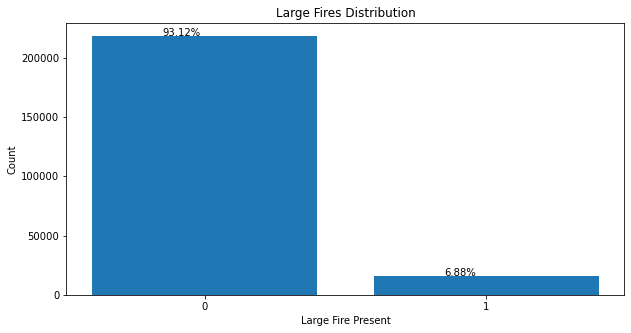

In [318]:
# Show the number of large fires

plt.figure(figsize=(10,5))
plt.bar(df_clean['Large Fire'].value_counts().index.astype('str'),df_clean['Large Fire'].value_counts())

# Bar labels
axes = plt.gca()
axes.set_axisbelow(True)
for i, j in enumerate(df_clean['Large Fire'].value_counts().sort_index()):
    axes.text(i-0.15, j + 50, str(round(j/df_clean['Large Fire'].shape[0]*100,2))+'%', color='black')


# Set chart and axis titles
plt.title('Large Fires Distribution')
plt.xlabel('Large Fire Present')
plt.ylabel('Count')

plt.show()

# Modeling Set Up
## Defining the Variables
Prior to modeling, the `X` and `y` variables will be defined. the `y` dependent variable is the `Large Fire` column. The independent `X` variable contains all other features columns excluding the `FIRE_SIZE`,`FIRE_SIZE_CLASS`, `Large Fire`. The latter two columns were generated using the `FIRE_SIZE` column and need to be removed from the `X` variable to prevent multicollinearity.

In [221]:
# X and y variables
X_org = df_clean.drop(columns=['FIRE_SIZE','FIRE_SIZE_CLASS', 'Large Fire'])
y_large_fire_org = df_clean['Large Fire']

In [222]:
# Confirm the shape of the X and y variables
print(f"The X variable has {X_org.shape[0]} rows and {X_org.shape[1]} columns")
print(f"The y variable has {y_large_fire_org.shape[0]} rows")

The X variable has 234417 rows and 18 columns
The y variable has 234417 rows


## Train / Test Split
With the `X` and `y` variables defined, the train / test split will be performed. The test set will contain 20 % of the dataset. 

In [223]:
# train and test split 
# 20% test set
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X_org, y_large_fire_org, 
        test_size=0.2, stratify=y_large_fire_org,  random_state=1)

#Reset indices
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [224]:
# Confirm the shape of the train / test datasets
print(f"The X_train dataset has {X_train.shape[0]} rows and {X_train.shape[1]} columns")
print(f"The y_train dataset has {y_train.shape[0]} rows")
print(f"The X_test dataset has {X_test.shape[0]} rows and {X_test.shape[1]} columns")
print(f"The y_test dataset has {y_test.shape[0]} rows")

The X_train dataset has 187533 rows and 18 columns
The y_train dataset has 187533 rows
The X_test dataset has 46884 rows and 18 columns
The y_test dataset has 46884 rows


_____
## Functions
Functions that will be used frequently within the notebook are defined here. 

In [225]:
### Create Classifcation Reports for Models
def class_report(model):
    y_pred = model.predict(X_test)
    return print(classification_report(y_test, y_pred))

In [226]:
### Create Confusion Matrix for Models
def confusion_matrix_generator (model):
    probabilities = model.predict_proba(X_test)
    # note rounded probabilities
    prob_df = pd.DataFrame(np.round(probabilities,4), columns=['probability of being class 0', 'probability of being class 1'])
    y_proba = probabilities[:, 1]
    # Build the confusion matrix as a dataframe
    y_pred = model.predict(X_test)
    confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted 0', 'Predicted 1'])

    # Add a column that sums up the actuals
    confusion_df['Sum of Actuals'] = confusion_df.sum(axis=1)

    # Add a row that sums up the predictions
    confusion_df = confusion_df.append(pd.Series(confusion_df.sum(axis=0)), ignore_index=True)

    # Fix the indices
    confusion_df.index=['Actual 0', 'Actual 1', 'Sum of Predictions'] 

    # Check
    return confusion_df

In [227]:
### Create ROC curve and AUC Score for Models
def ROC_AUC_score (model):
    y_proba = model.predict_proba(X_test)[:,1]
    fprs, tprs, thresholds = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    plt.figure()
    plt.plot(fprs, tprs, color='darkorange',
             lw=2, label='AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve for Credit Fraud Prediction')
    plt.legend(loc="best")
    plt.show()

    print(f'Area under curve (AUC):{roc_auc}')


In [228]:
# Feature importance extraction
def perm_importance (model):
    result = permutation_importance(model, X_test, y_test, n_repeats=100, random_state=0)
    # Calculate the average importance per feature
    importances = result.importances_mean

    # Normalize the importances
    normalized_importances = importances / importances.sum()


    # Put the variable names and their feature importances into a data frame
    permute_importances_df = pd.DataFrame({'Variable': X_train.columns,
                                   'Importance': importances,
                                   'Normalized Importance': normalized_importances})

    permute_importances_df.sort_values(by='Importance', ascending=False, inplace=True, ignore_index=True)
              
    return permute_importances_df


_____
## Modelling Pipelines:

For efficiency, the models will incorporate the use of pipelines and grid searches. At a baseline each pipeline will consist of the following:
- SMOTE-NC analysis: SMOTE-NC is used to re-sample the minority target. SMOTE will oversample the data. As there are about 16 thousand large fires and more than 200 thousand small fires, the imbalance may skew the model predictions towards the more populous class. Re-sampling the target minority class is necessary before proceeding. [SMOTE-NC Documentation]("https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html")
- Column transformer - One hot encoding: The non-numeric object columns need to be changed to numeric columns. One hot encoding will be performed on the `CIMIS Region`, `NWCG_CAUSE_CLASSIFICATION` and `NWCG_GENERAL_CAUSE` columns. 	
- Column transformer - Scaler: The numeric columns will be scaled using a Standard Scaler. Columns that had been one hot encoded and are not binarzied will not be scaled.

The following code will be used to set up the SMOTE-NC analysis and the column transformers within the pipelines. 

#### SMOTE-NC Re-sampling:
As an example, we can see how using SMOTE-NC changes the distribution of our target variable. SMOTE-NC will be done using the pipelines. Re-sampling will only occur on the training dataset. 

First, we want to specify the column indexes that will be used to transform the categorical columns and to scale the numeric columns. 

In [229]:
# Column indexes used to transform categorical columns
cat_cols = list(X_train.select_dtypes([object]).columns)
cat_cols_index = []
for i in cat_cols:
    col_index = X_train.columns.get_loc(i)
    cat_cols_index.append(col_index)
    
cat_cols_index 
print(F"The columns that will be One Hot Encoded are: {cat_cols}.")

The columns that will be One Hot Encoded are ['CIMIS Region', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE'].


In [230]:
# Column indexes used to scale numeric columns
num_cols = list(X_org.select_dtypes([np.int64,np.float64]).columns)
num_cols_index = []
for i in num_cols:
    col_index = X_train.columns.get_loc(i)
    num_cols_index.append(col_index)
    
num_cols_index
print(F"The columns that will be scaled using Standard Scaler are: {num_cols}.")

The columns that will be scaled using Standard Scaler are ['Stn Id', 'ETo (mm)', 'Precip (mm)', 'Sol Rad (W/sq.m)', 'Avg Vap Pres (kPa)', 'Avg Air Temp (C)', 'Dew Point (C)', 'Avg Wind Speed (m/s)', 'Avg Soil Temp (C)', 'Elevation', 'HmsLatitude', 'HmsLongitude', 'FIRE_YEAR', 'DISCOVERY_DOY', 'Month'].


Using SMOTE-NC() within the pipeline will up-sample our target class. We can compare the class distribution before and after re-sampling:

In [231]:
# First define SMOTENC() and fit onto our training set
sm = SMOTENC(random_state=1, categorical_features=cat_cols_index)
X_bal, y_bal = sm.fit_resample(X_train, y_train)

In [232]:
# Comparing the number of rows in the imbalanced datasets
print(F"The number of rows in the imbalanced data: {X_train.shape[0]}")
print(F"Occurrences of the target class in the imbalanced data: {y_train.sum()}")

The number of rows in the imbalanced data: 187533
Occurrences of the target class in the imbalanced data: 12906


In [233]:
# Comparing our target variables in the balanced datasets
print(F"The number of rows in the balanced data: {X_bal.shape[0]}")
print(F"Occurrences of the target class in the balanced data: {y_bal.sum()}")

The number of rows in the balanced data: 349254
Occurrences of the target class in the balanced data: 174627


We see that SMOTE-NC was able to balance the data so that there are equal amounts of large fires and small fires in the balanced data set. The dataset is also oversampled to almost 350 thousand rows. The original training data set has almost 190 thousand rows. 

#### Column Transformers
Next we will set up the column transformers on the columns according to the above descriptions. These column transformers will be used within our pipelines. 

In [234]:
# One hot encoding the categorical columns
cat_transformer = SKPipeline(
    steps=[('col_transform', OneHotEncoder())])

cat_process = ColumnTransformer(transformers=[("cat", cat_transformer, cat_cols_index)], # TRANSFORM NON-NUMERIC COLUMNS
    remainder='passthrough'
)

In [235]:
# Standard Scaler on the numeric columns
num_transformer = SKPipeline(
    steps=[("scaler", StandardScaler())]
)
num_process = ColumnTransformer(transformers=[("num", num_transformer, num_cols_index)], #SCALE
    remainder='passthrough'
)   

With our pipelines set up, modeling will be more efficient.
_____
# Modeling
The models will look to optimize the F1 score. The F1 score is known as the harmonic mean between precision and recall. This means that the F1 score values the preciseness and the robustness of the model. 

Recall compares the number of points _correctly classified_ as positive against the number of points the model _claims_ to be in the positive class. 

$$Recall = \frac{\text{number of true positives}}{\text{number of true positives} + \text{number of false negatives}} = \frac{TP}{TP+FN}$$

Precision looks at how focused the model is. It determines what proportion of members who are _classified_ as the positive class actually _belong_ to the positive class. 

$$Precision = \frac{\text{number of true positives}}{\text{number of true positives} + \text{number of false positives}} = \frac{TP}{TP+FP}$$

                                                *(Equations from BrainStation)*

**What does this mean in our business case?**

**True Positive / True Negative:** Our model will correctly identify the fires as either large or small - we want large values here. <br>
- A large value here is fairly self explanatory. If there is a fire of significance, we want to know of it so that the proper authorities can be notified and resources can be deployed quickly. We want to know that large fires are correctly predicted at a high rate. Likewise, if a fire is small, we want our model to correctly classify fires as such. <br>
    
**False Negative:** Our model predicts fires as small, when they are in fact large - we want a minuscule value here. The value should be smaller than the False Positive.
- If a fire is _predicted not_ to be large, fewer resources may be prepared and deployed. If this fire turns out to be large, then insufficient resources will be available. Inevitably, the large fire would not be contained and will continue to grow. 

**False Positive:** Our model classifies a fire as large, when it is small - We want a small value here, but it can be larger than the False Negative value. 
- If a fire is classified as large, more resources will be prepared. As the fire turns out to be small, the fire will be put out quickly due to the excess resources. This may cost additional time and money, but damage can be minimized. During the annual budget, a higher value here may lead to overestimating the projected resources needed as fires will be projected to be worse than it is. Presumably with wildfires, it is better to be overprepared. 

With a high true positive rate and a low false negative value, we want recall to be maximized. In contrast, precision, which accounts for false positives, does not need to be optimized, but a higher precision would still be used in planning to provide overestimations in annual budgets or for recruiting firefighting personnel. 


## Model 1: Logistic Regression
We can setup a baseline binary classification of the `Large Fire` target variable using logistic regression. This model will predict the probability of the target class occurring.  If the probability reaches a threshold of 0.5 or greater, the model will classify the fire as large. First, we will set up the logistic regression pipeline and fit it to our training data set. This model will optimize for the F1 score.

We want to determine the optimal C parameter for this model:
- The C value is a measure of the regularization strength. Smaller values indicate stronger regularization.

**Note: Fitting the Logistic Regression Pipeline has a run time of about 15 minutes. To save time, the fitted model was pickled and loaded. If the model needs to be refitted to a new dataset, set the `LR_grid_flag` to 0.

In [244]:
# To load a fitted model set `LR_grid_flag` to 1.
# If the model needs to be refitted, set `LR_grid_flag` to 0.

LR_f1_grid_flag = 1

# Load a fitted model.
if LR_f1_grid_flag == 1:
    LR_f1_grid = joblib.load("LR_f1_grid.pkl")
    
    
# Refitting the model
else:
    # Setting up Logistic Regression Pipeline
    LR_pipeline = ILPipeline(steps = [['smote', SMOTENC(random_state=1, categorical_features=cat_cols_index)],
                                    ['col_transform', cat_process],
                                    ['scaler', num_process],
                                    ['model', LogisticRegression(random_state=11,
                                                                      max_iter=1000)]])
    

    # Setting up parameters for the Logistic regression
    C_range = np.array([.001,.1, 1,10,100,1000]) 

    param_grid = [{
            'model': [LogisticRegression()], 
            'model__C': C_range        
    }]

    LR_f1_grid = GridSearchCV(LR_pipeline, param_grid, cv=5, scoring='f1')

    # Fit grid onto training set
    # 15 min run time
    LR_f1_grid.fit(X_train, y_train) 
    
    # Save the fitted logistic regression model as a .pkl file for later access. 
    joblib.dump(LR_f1_grid, "LR_f1_grid.pkl")
    

In [245]:
# Determine the best parameters from this grid search. 
LR_best_parameters = LR_f1_grid.best_params_
LR_best_parameters

{'model': LogisticRegression(), 'model__C': 1.0}

The logistic regression model has been fitted to the training data set. We get an optimal model when the regularization parameter (C) is set to 1. This means that regularization penalty is not too high or low. The training data is a reasonable representation of real world data. To see if this is an accurate expectation, we can see how the F1 scores compare between the training and test sets. 

In [246]:
# Print F1 scores for the train and test set
print(F"Train set F1 score: {LR_f1_grid.score(X_train, y_train)}") 
print(F"Test set F1 score: {LR_f1_grid.score(X_test, y_test)}") 

Train set F1 score: 0.15531552508462151
Test set F1 score: 0.1543771842775165


We see that the F1 scores in both our training and test sets are fairly close. That means the training set is a good representation of real world data as the test set has been untouched. Unfortunately, the F1 scores are quite low. The F1 score is calculated using the precision and recall scores so the F1 score is never greater than either of those scores. 

We can produce a classification report and and confusion matrix to confirm how the fires are being classified. 

In [247]:
# Logistic regression model classification report
class_report(LR_f1_grid)

              precision    recall  f1-score   support

           0       0.95      0.58      0.72     43657
           1       0.09      0.55      0.15      3227

    accuracy                           0.58     46884
   macro avg       0.52      0.57      0.44     46884
weighted avg       0.89      0.58      0.68     46884



In [248]:
# Produce confusion matrix for the logistic regression model
confusion_matrix_generator(LR_f1_grid)

,Predicted 0,Predicted 1,Sum of Actuals
Actual 0,25496,18161,43657
Actual 1,1438,1789,3227
Sum of Predictions,26934,19950,46884


The F1 score is being reduced due to a low precision. Almost 42% of small fires (Class 0) are being classified as false positives. The model is having trouble classifying small fires. With recall,  large fires are predicted correctly 55% of the time. The model has a slightly greater chance of predicting large fires than a coin toss. 

The Receiver operating characteristic (ROC) curve allows us to visually assess the relationship between the true positive rate (TPR) and the false positive rate (FPR) as the model's threshold changes. In an optimal model, at any given threshold, the true positive rate would be maximized and the false positive rate would be minimized. This relationship is scored by looking at the area under the curve (AUC score).

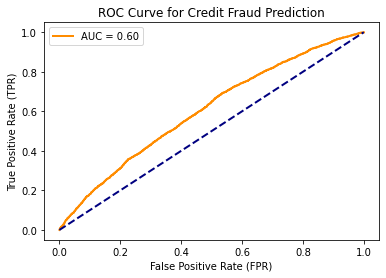

Area under curve (AUC):0.6042730212452356


In [320]:
# ROC and AUC score
ROC_AUC_score(LR_f1_grid)

An AUC score of 0.60 indicates our model is better than random chance at predicting the positive class. There is a 60% chance of our model correctly predicting our positive class (Class 1). For comparison, the best model would have an AUC score of 1 and would be able to correctly categorize all positive and negative classes. 

For data to be classified into the target class, logistic regression models require that the data point has a probability that exceeds the threshold of 0.5 or 50%. A threshold of 50% is the default standard, This means that a point would have more than 50% chance of occurring. It is possible to decrease the threshold to see if the model is able to classify more large fires. Lowering the threshold would also increase the number of false positives. As an example, we can try a threshold of 0.45 or 45%.

First let's look at the probabilities of the test set. Based on the probabilities, the model will assign each point a predicted class at the 0.45 threshold. 

In [249]:
# Let's gather all the probabilties from our test set. 
# Reference: BrainStation 
probabilities = LR_f1_grid.predict_proba(X_test)
# note rounded probabilities
prob_df = pd.DataFrame(np.round(probabilities,4), columns=['probability of being class 0', 'probability of being class 1'])
y_proba = probabilities[:, 1]
y_proba

array([0.44781851, 0.54746094, 0.21640102, ..., 0.41423191, 0.37846277,
       0.70791889])

In [250]:
# If the probability that a data point belongs to the positive class is greater than 0.45, it gets classified as 1; otherwise, it gets classified as 0
# Reference: BrainStation 
y_pred_45 = np.where(y_proba > 0.45, 1, 0)

print('Classification report for a threshold of 0.45 \n')
print(classification_report(y_test, y_pred_45))

Classification report for a threshold of 0.45 

              precision    recall  f1-score   support

           0       0.95      0.43      0.60     43657
           1       0.09      0.72      0.15      3227

    accuracy                           0.45     46884
   macro avg       0.52      0.58      0.37     46884
weighted avg       0.89      0.45      0.57     46884



In [251]:
# Data points predicted to be in the positive class for a logistic regression model with a threshold of 0.45
sum(y_pred_45)

27079

There are 27 thousand points predicted to be in the positive class when the threshold is set to 0.45. If the threshold is lowered to 0.45 from 0.5, the precision remains at 0.09, while the recall increased a much greater amount to 0.72. There's a few reasons for this increase in scores:
- The lower threshold allows more data points to be correctly and incorrectly classified as large fires. True positives and false positives increase.
- Fewer points are classified as small fires. True negatives decrease. 
- The significant jump in recall score is due to a decrease in false negatives. 
- Precision doesn't change due to a increase in both true positives and false positives. 

We can look at the confusion matrix for the threshold of 0.45 to confirm this. 

In [252]:
# Confusion matrix for a logistic regression model with a threshold of 0.45
# Build the confusion matrix as a dataframe
confusion_df = pd.DataFrame(confusion_matrix(y_test, y_pred_45), columns=['Predicted 0', 'Predicted 1'])

# Add a column that sums up the actuals
confusion_df['Sum of Actuals'] = confusion_df.sum(axis=1)

# Add a row that sums up the predictions
confusion_df = confusion_df.append(pd.Series(confusion_df.sum(axis=0)), ignore_index=True)

# Fix the indices
confusion_df.index=['Actual 0', 'Actual 1', 'Sum of Predictions'] 

# Check
confusion_df

,Predicted 0,Predicted 1,Sum of Actuals
Actual 0,18896,24761,43657
Actual 1,909,2318,3227
Sum of Predictions,19805,27079,46884


Indeed we do see a large number of false positives, almost 27 thousand, which leads to the small precision score. There's also a small number of false negatives, which would allow for a greater recall. 

A greater number of false positives (24761) than true negatives (18896) is concerning. Small fires are being labeled as large more often than they are being labeled as small (False Positive > True Negative). Forest fires that are labeled as false positives, may lead to resources being deployed when it is not necessary. While resources being misused may be costly, at least the small fires will be contained quickly with the additional resources. In contrast, if there were lots of false negatives and recall is low, thinking a fire is small when it is actually large may lead to a larger burn area. 

If governments want high recall, lowering the threshold may help, but precision may be sacrificed. If governments want to have a higher budget and more available resources when preparing for the wildfire season, the low precision may help. 

Let's add the model's metrics to a scores dataframe so that we can compare the performance of different models.

In [289]:
# Add model's metrics to scores dataframe
# Let's gather all the probabilties from our test set. 
probabilities = LR_f1_grid.predict_proba(X_test)
# note rounded probabilities
prob_df = pd.DataFrame(np.round(probabilities,4), columns=['probability of being class 0', 'probability of being class 1'])
y_proba = probabilities[:, 1]

# Calculate the predicted target classification
y_pred = np.where(y_proba > 0.5, 1, 0)


# data frame to track the model's scores
df_scores = pd.DataFrame({
                        "Classification Model": ["Logistic Regression"],
                        "F1 Score": [round(f1_score(y_test, y_pred), 5)],
                        "Recall ": [round(recall_score(y_test, y_pred),5)],
                        "Precision": [round(precision_score(y_test, y_pred),5)],
                        "AUC Score": [round(roc_auc_score(y_test, y_pred),5)]
    })
                                        
df_scores

,Classification Model,F1 Score,Recall,Precision,AUC Score
0,Logistic Regression,0.15438,0.55438,0.08967,0.5692


## Model 2: Logistic Regression and PCA
Logistic regression is often used as a baseline model. On its own, it was able to detect large fires slightly better than random chance. As there are over 20 features in this dataset, adjusting the dimensionality may improve the model by visualizing the relationship between independent and dependent variables in a different perspective. PCA and the kernel trick are two methods that can be used in combination with our logistic regression model. Additionally, this may reduce the effects of multicollinearity, especially in linear models. Multicollinearity makes it difficult to determine the effects of an independent predictor variable on the dependent response variable. 

PCA will help reduce multicollinearity and attempt to capture the most significant information in fewer components. This next model will determine the optimal `C` value for the logistic regression model and the optimal number of PCA components.

**Note: Fitting the Logistic Regression and PCA Pipeline has a run time of about 1.5 hours. The fitted model was pickled and loaded. If the model needs to be refitted to a new dataset, set the `LR_PCA_f1_grid_flag` to 0.**

In [256]:
# To load a fitted model set `LR_PCA_grid_flag` to 1.
# If the model needs to be refitted, set `LR_PCA_grid_flag` to 0.

LR_PCA_f1_grid_flag = 1

# Load a fitted model.
if LR_PCA_f1_grid_flag == 1:
    LR_PCA_f1_grid = joblib.load("LR_PCA_f1_grid.pkl")
    
# Refitting the model
else:

    # Set up the logistic regression with PCA 
    LR_PCA_pipeline = ILPipeline(steps = [['smote', SMOTENC(random_state=1, categorical_features=cat_cols_index)],
                                    ['col_transform', cat_process],
                                    ['scaler', num_process],
                                    ['dim_reducer', PCA()], 
                                    ['model', LogisticRegression(random_state=11,
                                                                      max_iter=1000)]])

    # The grid search will optimize through various regularization rates and attempt to perform dimension reduction
    C_range = np.array([.001,.1, 1,10,100,1000]) 

    param_grid = [{
            'dim_reducer': [PCA(), KernelPCA()],
            'dim_reducer__n_components': [2, 3, 4],
            'model': [LogisticRegression()], 
            'model__C': C_range        
    }]

    # Perform the grid search with the specified parameters
    LR_PCA_f1_grid = GridSearchCV(LR_PCA_pipeline, param_grid, cv=5, scoring='f1')

    # Fit logistic regression with PCA model to the training set
    LR_PCA_f1_grid.fit(X_train, y_train)  
    
    # Save the fitted model as a .pkl file for later access. 
    joblib.dump(LR_PCA_f1_grid, "LR_PCA_f1_grid.pkl")

In [322]:
# Logistic regression with PCA model's best parameters
LR_PCA_f1_grid.best_params_

{'dim_reducer': PCA(n_components=3),
 'dim_reducer__n_components': 3,
 'model': LogisticRegression(C=0.001),
 'model__C': 0.001}

The logistic regression model with PCA has been fitted to the training data set. The optimal model has a regularization parameter (C) of 0.001 and has been reduced to 3 components using PCA. A regularization of C = 0.001 is low, indicating that the training data may not be a good representation of real world data. 

We can confirm this by looking at the F1 scores to compare the train set with the test set. 

In [323]:
# Print F1 scores for the train and test set
print(F"Train set F1 score: {LR_PCA_f1_grid.score(X_train, y_train)}") 
print(F"Test set F1 score: {LR_PCA_f1_grid.score(X_test, y_test)}") 

Train set F1 score: 0.14491361146228401
Test set F1 score: 0.14280895844576363


The F1 scores between the train and test sets are quite similar, indicating that the model is not overfitting the training set. In fact the precision and the recall is likely very similar in both the training and the unseen data from the test set. 

We can look into the model's metrics in more detail to see how our model is performing.

In [257]:
# Produce classification report for the logistic regression model with PCA
class_report(LR_PCA_f1_grid)

              precision    recall  f1-score   support

           0       0.95      0.44      0.60     43657
           1       0.08      0.66      0.14      3227

    accuracy                           0.46     46884
   macro avg       0.51      0.55      0.37     46884
weighted avg       0.89      0.46      0.57     46884



In [258]:
# Produce confusion matrix for the logistic regression model with PCA
confusion_matrix_generator(LR_PCA_f1_grid)

,Predicted 0,Predicted 1,Sum of Actuals
Actual 0,19353,24304,43657
Actual 1,1110,2117,3227
Sum of Predictions,20463,26421,46884


The classification report and the confusion matrix are similar to what was see in our logistic regression model when the threshold was set to 0.45! Unfortunately, the F1 score is still very low due to the large number of false positives and a low precision score. The recall score is also reasonable with two thirds of large fires correctly being classified. 


|Model |Recall |Precision | True Negative | True Positive | False Negative | False Positive |
|--|--|--|--|--|--|--|
|Logistic Regression (0.5 Threshold)|0.09|0.58|25496|1789|1438|18161|
|Logistic Regression (0.45 Threshold)|0.09|0.72|18896|2318|909|24761|
|Logistic Regression with PCA (0.5 Threshold)|0.08|0.66|19353|2117|1110|24304|

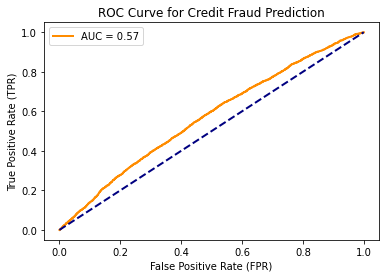

Area under curve (AUC):0.5686269969750883


In [324]:
# AUC score for the logistic regression model with PCA
ROC_AUC_score(LR_PCA_f1_grid)

From this model, we see an AUC score of 0.57. The classifier is able to distinguish large fires at a rate that is slightly better than a coin toss. This is not a very reliable model, but it does perform slightly better than the logistic regression model on its own. If only recall was the main focus, we see that changing the threshold would maximize this value. For example, on the ground firefights would prioritize recall and disregard precision, in order to gather more resources. The excess false positives would be preferred over a big number of large fires hidden as false negatives. 

We can take a look at the effects of changing thresholds on each of our metrics.  

In [325]:
# Let's gather all the probabilties from our test set. 
# Reference: BrainStation 
probabilities = LR_PCA_f1_grid.predict_proba(X_test)
# note rounded probabilities
prob_df = pd.DataFrame(np.round(probabilities,4), columns=['probability of being class 0', 'probability of being class 1'])
y_proba = probabilities[:, 1]
y_proba

# Calculate the predicted target classification
y_pred = np.where(y_proba > 0.5, 1, 0)

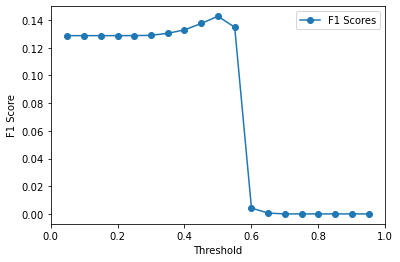

In [326]:
# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds = np.arange(0.05, 1, 0.05)

f1_score_list = []
precisions = []
recalls = []
roc_auc_list = []

for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(y_proba > threshold, 1, 0)
    y_threshold = pd.Series(y_threshold)
    
    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)
    f1_scores = f1_score(y_test, y_threshold)  # f1_scores = ((2*precision*recall) / (recall + precision))
    roc_auc = roc_auc_score(y_test, y_threshold)
    
    # Append to list
    precisions.append(precision)
    recalls.append(recall)
    f1_score_list.append(f1_scores)
    roc_auc_list.append(roc_auc)

# Visualize the result
plt.figure()
plt.plot(thresholds, f1_score_list, label='F1 Scores', marker='o')
plt.xlim(0, 1)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [327]:
# data frame to track the model's scores
df_LR_F1_scores = pd.DataFrame({
                        "Threshold": thresholds,
                        "F1 Score": f1_score_list,
                        "Precision": precisions,        
                        "Recall": recalls,
                        "AUC Score": roc_auc_list  
                        })
                                        
df_LR_F1_scores

,Threshold,F1 Score,Precision,Recall,AUC Score
0,0.05,0.128794,0.068829,1.000000,0.500000
1,0.10,0.128794,0.068829,1.000000,0.500000
2,0.15,0.128794,0.068829,1.000000,0.500000
3,0.20,0.128794,0.068829,1.000000,0.500000
4,0.25,0.128817,0.068843,1.000000,0.500103
5,0.30,0.129013,0.068963,0.998141,0.501040
6,0.35,0.130495,0.069843,0.991633,0.507728
7,0.40,0.132946,0.071514,0.942981,0.519009
8,0.45,0.137600,0.074947,0.838860,0.536765
9,0.50,0.142809,0.080126,0.656027,0.549662


Although not great, the F1 score is  actually maximized at the current 0.5 threshold. We see that as the threshold is lowered, the recall does improve, but the number of false positives also increase, as we see the precision and AUC scores decrease. On the other hand, if the threshold increases to 0.55, the recall score drops significantly, without much improvement in the precision and AUC scores. 

We will add the model metrics with the 0.5 threshold to the scores dataframe.

In [291]:
# data frame to track the model's scores
df_scores = df_scores.append({
                        "Classification Model": "Logistic Regression & PCA",
                        "F1 Score": round(f1_score(y_test, y_pred), 5),
                        "Recall ": round(recall_score(y_test, y_pred),5),
                        "Precision": round(precision_score(y_test, y_pred),5),
                        "AUC Score": round(roc_auc_score(y_test, y_pred),5)},
                        ignore_index = True)
                                        
df_scores

,Classification Model,F1 Score,Recall,Precision,AUC Score
0,Logistic Regression,0.15438,0.55438,0.08967,0.56920
1,Logistic Regression & PCA,0.14281,0.65603,0.08013,0.54966


## Model 3: Decision Trees
Let's see if decision trees will work better than the logistic regression in this binary classification problem. Decision trees are able to learn non-linear decision boundaries by creating splits on each feature. This allows decision tree classification to have more flexibility than logistic regression. Unfortunately, decision trees tend to overfit, but this can be prevented by optimizing the following hyperparameters:
- max_depth: Limits the number of splits or features that the model considers
- min_samples_leaf: Minimum requirement for the number of points each leaf must include

To prevent overfitting, we can loop through the number of leaves and the max depth level. Let's set up our decision trees pipeline.

**Note: Fitting the Logistic Regression and PCA Pipeline has a long run time. The fitted model was pickled and loaded. If the model needs to be refitted to a new dataset, set the `DT_f1_grid_flag` to 0.**

In [236]:
# To load a fitted model set `DT_f1_grid_flag` to 1.
# If the model needs to be refitted, set `DT_f1_grid_flag` to 0.

DT_f1_grid_flag = 1

# Load a fitted model.
if DT_f1_grid_flag == 1:
    DT_f1_grid = joblib.load("DT_f1_grid.pkl")
    
    
# Refitting the model
else:
    # Decision trees pipeline
    DT_pipeline = ILPipeline(steps = [['smote', SMOTENC(random_state=1, categorical_features=cat_cols_index)],
                                ['col_transform', cat_process],
                                ['scaler', num_process],
                                ['model', DecisionTreeClassifier()]])
    

    # Parameters for the decision trees pipeline
    depths = list(range(1, 20, 2))
    leaves = list(range(100, 1000, 100))

    param_grid = [{
            'model': [DecisionTreeClassifier()], 
            'model__max_depth': depths,
            'model__min_samples_leaf': leaves       
    }]

    DT_f1_grid = GridSearchCV(DT_pipeline, param_grid, cv=3, scoring='f1', n_jobs = -1)

    # Fit grid onto training set
    # 15 min run time
    DT_f1_grid.fit(X_train, y_train) 
    
    # Save the fitted logistic regression model as a .pkl file for later access. 
    joblib.dump(DT_f1_grid, "DT_f1_grid.pkl")

In [237]:
DT_f1_grid.best_params_

{'model': DecisionTreeClassifier(max_depth=7, min_samples_leaf=300),
 'model__max_depth': 7,
 'model__min_samples_leaf': 300}

Our grid search revealed that the decision trees model has been optimized with a max depth of 7. We will also use a minimum sample leaf of 300 in this model. Since decision trees tend to overfit, let's look at how our F1 score compares between the train and test set. 

In [328]:
# Print F1 scores for the train and test set
print(F"Train set F1 score: {DT_f1_grid.score(X_train, y_train)}") 
print(F"Test set F1 score: {DT_f1_grid.score(X_test, y_test)}") 

Train set F1 score: 0.1651875692502506
Test set F1 score: 0.16381470001273832


The F1 scores are similar in the train and test set. The model doesn't seem to be overfitting the training set. Now we can look at the model in detail using our classification report and confusion matrix.

In [332]:
# Decision tree classification report
class_report(DT_f1_grid)

              precision    recall  f1-score   support

           0       0.95      0.58      0.72     43657
           1       0.09      0.60      0.16      3227

    accuracy                           0.58     46884
   macro avg       0.52      0.59      0.44     46884
weighted avg       0.89      0.58      0.68     46884



In [331]:
# Decision tree confusion matrix
confusion_matrix_generator(DT_f1_grid)

,Predicted 0,Predicted 1,Sum of Actuals
Actual 0,25262,18395,43657
Actual 1,1298,1929,3227
Sum of Predictions,26560,20324,46884


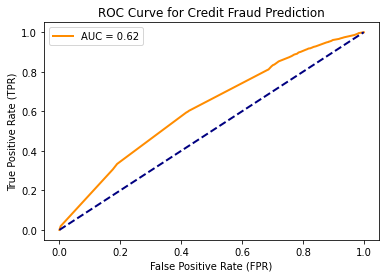

Area under curve (AUC):0.6171038871285673


In [333]:
ROC_AUC_score(DT_f1_grid)

From our decision tree model, we get a F1 score of 0.16. This is the best F1 score we've seen so far, but the value is still quite low. The recall score has also dropped compared to the logistic regression with PCA model. Similar to our previous models, the precision score is quite low as the model still produces many false positives. Finally, an AUC score of 0.62 is also the highest we have seen so far. Unfortunately, as we see with the recall score, some large fires would still be misclassified as false negatives. With a recall score of 60%, firefighters will experience larger fires than expected 40% of the time. 

Although the scoring metrics are low, we can take a look at the features that the nodes are created on. We can determine how individual features are assisting or hindering the decision tree model's prediction. 

In [241]:
# Calculate the average importance per feature
result = permutation_importance(DT_f1_grid, X_test, y_test, n_repeats=100, random_state=0)
importances = result.importances_mean

# Normalize the importances
normalized_importances = importances / importances.sum()


# Put the variable names and their feature importances into a data frame
dt_permute_importances_df = pd.DataFrame({'Variable': X_train.columns,
                               'Importance (%)': (importances*100),
                               'Normalized Importance (%)': (normalized_importances*100)})

dt_permute_importances_df.sort_values(by='Normalized Importance (%)', ascending=False, inplace=True, ignore_index=True)

dt_permute_importances_df

,Variable,Importance (%),Normalized Importance (%)
0,Avg Air Temp (C),2.214418,40.295301
1,NWCG_GENERAL_CAUSE,1.353917,24.636954
2,NWCG_CAUSE_CLASSIFICATION,1.138266,20.712789
3,Stn Id,0.708564,12.893597
4,HmsLongitude,0.066610,1.212097
5,FIRE_YEAR,0.009422,0.171459
6,Avg Soil Temp (C),0.004931,0.089733
7,ETo (mm),0.004335,0.078891
8,Sol Rad (W/sq.m),0.004047,0.073644
9,DISCOVERY_DOY,0.000342,0.006231


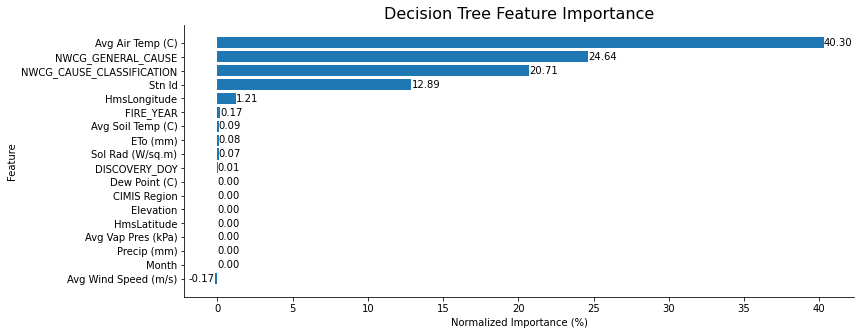

In [434]:
# Plot the Permutation Feature Importance

fig, ax = plt.subplots(figsize=(12,5))

hbars = ax.barh(dt_permute_importances_df['Variable'], dt_permute_importances_df['Normalized Importance (%)'], align='center')
plt.title('Decision Tree Feature Importance', fontsize=16)
plt.ylabel('Feature')
plt.xlabel('Normalized Importance (%)')
ax.bar_label(hbars, fmt='%.2f') # Label with specially formatted floats

plt.gca().invert_yaxis()
sns.despine()

plt.show()


Permutation feature importance is used to measure a features predictive power within this decision tree model. Since decision trees tend to overfit, permutation feature importance avoids this issue by computing on the test data [(Reference)]('https://scikit-learn.org/stable/modules/permutation_importance.html#:~:text=The%20permutation%20feature%20importance%20is,model%20depends%20on%20the%20feature'). Additionally, where decision trees would favor features with high cardinality, such as numeric features, permutation importance avoids these biases. We see that the permutation plot ranks the `Avg Air Temp (C)`, a numeric variable, as the most important feature in predicting the wildfire size. In the second and third position, the decision tree model indicates that large fires are affected by the cause of fire. The longitude and the weather station also have some predictive power for large fires within this model. Interestingly, other geographical features such as latitude or `CIMIS Region` do not predict large fires well. Finally the `Avg Wing Speed (m/s)` has a negative permutation feature importance meaning that the wind speed does not contribute to the predictions, but the prediction is made more accurate only by random chance during the permutation importance calculation,

We can take a look at how the cause of the fires may be related to the large fires.

In [373]:
# Create data frame for the general cause of large fires
df_fire_gen_cause = df_clean.groupby(['NWCG_GENERAL_CAUSE'], as_index=False)['Large Fire'].sum()
df_fire_gen_cause = df_fire_gen_cause.sort_values(by=['Large Fire'], ascending = False)

df_fire_cause = df_clean.groupby(['NWCG_CAUSE_CLASSIFICATION'], as_index=False)['Large Fire'].sum()
df_fire_cause = df_fire_cause.sort_values(by=['Large Fire'], ascending = False)

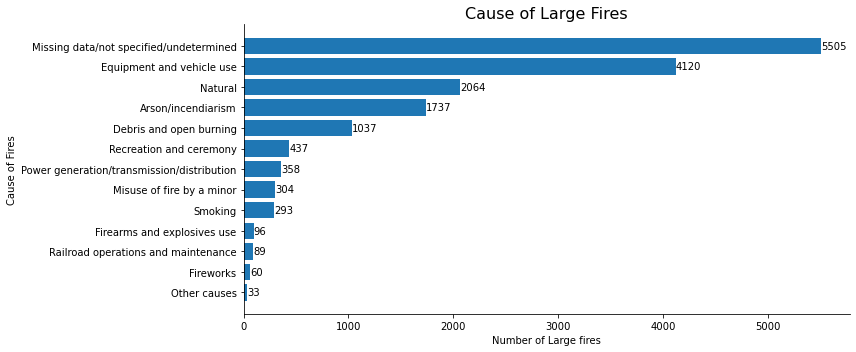

In [435]:
# Plot the general causes of large fires
fig, ax = plt.subplots(figsize=(12,5))

hbars = ax.barh(df_fire_gen_cause['NWCG_GENERAL_CAUSE'], df_fire_gen_cause['Large Fire'], align='center')
plt.title('Cause of Large Fires', fontsize=16)
plt.ylabel('Cause of Fires')
plt.xlabel('Number of Large fires')
ax.bar_label(hbars) # Label with specially formatted floats

plt.gca().invert_yaxis()
sns.despine()
plt.tight_layout()
plt.show()

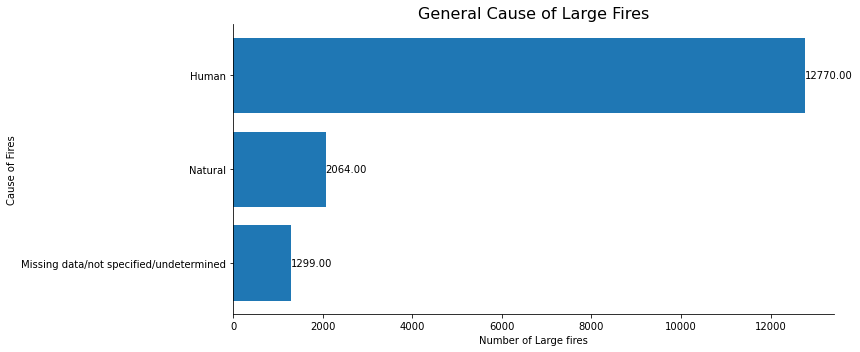

In [436]:
# Plot the general causes of large fires
fig, ax = plt.subplots(figsize=(12,5))

hbars = ax.barh(df_fire_cause['NWCG_CAUSE_CLASSIFICATION'], df_fire_cause['Large Fire'], align='center')
plt.title('General Cause of Large Fires', fontsize=16)
plt.ylabel('Cause of Fires')
plt.xlabel('Number of Large fires')
ax.bar_label(hbars, fmt='%.2f') # Label with specially formatted floats

plt.gca().invert_yaxis()
sns.despine()
plt.tight_layout()
plt.show()


When looking at the causes, we see that humans are the largest contributors to large fires. Many of these causes can be avoided such as debris and open burning or recreational causes. Resources into education or providing fire extinguishers can also be used to limit the large number of fires caused by vehicles or equipment. 

Finally, we will add the metric scores to our scores dataframe.

In [400]:
# Let's gather all the probabilties from our test set. 
probabilities = DT_f1_grid.predict_proba(X_test)
# note rounded probabilities
prob_df = pd.DataFrame(np.round(probabilities,4), columns=['probability of being class 0', 'probability of being class 1'])
y_proba = probabilities[:, 1]

# Calculate the predicted target classification
y_pred = np.where(y_proba > 0.5, 1, 0)


In [401]:
# data frame to track the model's scores
df_scores = df_scores.append({
                        "Classification Model": "Decision Trees",
                        "F1 Score": round(f1_score(y_test, y_pred), 5),
                        "Recall ": round(recall_score(y_test, y_pred),5),
                        "Precision": round(precision_score(y_test, y_pred),5),
                        "AUC Score": round(roc_auc_score(y_test, y_pred),5)},
                        ignore_index = True)
                                        
df_scores

,Classification Model,F1 Score,Recall,Precision,AUC Score
0,Logistic Regression,0.15438,0.55438,0.08967,0.56920
1,Logistic Regression & PCA,0.14281,0.65603,0.08013,0.54966
2,Decision Trees,0.16381,0.59777,0.09491,0.58821
3,Random Forest,0.18489,0.56430,0.11056,0.61437
4,XGBoost,0.14161,0.11063,0.19669,0.53862
5,Decision Trees,0.16381,0.59777,0.09491,0.58821


## Model 4: Random forests
Random forest builds off of decision trees by utilizing an ensemble of decision trees. Each decision tree is optimized separately. The overfitting that may occur within individual decision trees is reduced by averaging multiple independent decision trees. Random forests can also be optimized using the following hyperparameters:

- n_estimators: This is the number of decision trees used
- max_depth: Similar to the decision trees model, this hyperparameter defines the number of features within each tree
- min_samples_leaf: Similar to the decision trees model, this hyperparameter species the minimum number of samples required in each leaf

Since random forests utilize an ensemble of decision trees, this is more computationally expensive. We will optimize our modeling by using a randomized search first before fine tuning with grid search.  

**Note: Fitting the Random Forest Pipeline has a long run time. To save time, the fitted model was pickled and loaded. If the model needs to be refitted to a new dataset, set the `RF_f1_grid_flag` to 0.**

In [262]:
# To load a fitted model set `RF_f1_grid_flag` to 1.
# If the model needs to be refitted, set `RF_f1_grid_flag` to 0.

RF_f1_grid_flag = 1

# Load a fitted model.
if RF_f1_grid_flag == 1:
    RF_f1_grid = joblib.load("RF_f1_grid.pkl")
    
# Refitting the model
else:
    # Setting the Random Forest Pipeline
    RF_pipeline = ILPipeline(steps = [['smote', SMOTENC(random_state=1, categorical_features=cat_cols_index)],
                                ['col_transform', cat_process],
                                ['scaler', num_process],
                                ['model', RandomForestClassifier(n_estimators = 100)]])
    
    # Setting the parameters for the Random Forest Pipeline
    depths = list(range(1, 20, 2))
    leaves = list(range(100, 1000, 100))

    param_grid = [{
            'model': [RandomForestClassifier()], 
            'model__max_depth': depths,
            'model__min_samples_leaf': leaves  
    }]

    RF_f1_grid = RandomizedSearchCV(RF_pipeline, param_grid, n_iter=25, cv=3, scoring='f1', n_jobs = -1, random_state = 1)
    
    # Fit grid onto training set
    RF_f1_grid.fit(X_train, y_train) 
    
    # Save the fitted logistic regression model as a .pkl file for later access. 
    joblib.dump(RF_f1_grid, "RF_f1_grid.pkl")

In [263]:
RF_f1_grid.best_params_

{'model__min_samples_leaf': 200,
 'model__max_depth': 13,
 'model': RandomForestClassifier(max_depth=13, min_samples_leaf=200)}

The randomized search has determined the optimal model as one with a minimum of 200 samples per leaf and a maximum depth of 13. Using a grid search, we can fine tune the `max_depth` and the `min_samples_leaf` range.

**Note: Fitting the fine tuned Random Forest Pipeline has a long run time. To save time, the fitted model was pickled and loaded. If the model needs to be refitted to a new dataset, set the `RF_f1_best_grid_flag` to 0.**

In [268]:
# To load a fitted model set `RF_f1_best_grid_flag` to 1.
# If the model needs to be refitted, set `RF_f1_best_grid_flag` to 0.

RF_f1_best_grid_flag = 1

# Load a fitted model.
if RF_f1_best_grid_flag == 1:
    RF_f1_best_grid = joblib.load("RF_f1_best_grid.pkl")
    
# Refitting the model
else:
    # Setting the fine tuned Random Forest Pipeline
    RF_pipeline = ILPipeline(steps = [['smote', SMOTENC(random_state=1, categorical_features=cat_cols_index)],
                                ['col_transform', cat_process],
                                ['scaler', num_process],
                                ['model', RandomForestClassifier(n_estimators = 100)]])
    
    # Setting the parameters for the fine tuned Random Forest Pipeline
    depths = list(range(10, 15, 1))
    leaves = list(range(100, 300, 20))

    param_grid = [{
            'model': [RandomForestClassifier()], 
            'model__max_depth': depths,
            'model__min_samples_leaf': leaves  
    }]

    RF_f1_best_grid = GridSearchCV(RF_pipeline, param_grid, cv=3, scoring='f1', n_jobs = -1)
    
    # Fit grid onto training set
    RF_f1_best_grid.fit(X_train, y_train) 
    
    # Save the fitted logistic regression model as a .pkl file for later access. 
    joblib.dump(RF_f1_best_grid, "RF_f1_best_grid.pkl")

In [269]:
RF_f1_best_grid.best_params_

{'model': RandomForestClassifier(max_depth=14, min_samples_leaf=140),
 'model__max_depth': 14,
 'model__min_samples_leaf': 140}

Using a grid search to fine tune the model, the optimal model has a maximum depth of 14 and 140 samples per leaf. Let's compare the scoring in the train and test sets.

In [406]:
# Print F1 scores for the train and test set
print(F"Train set F1 score: {RF_f1_best_grid.score(X_train, y_train)}") 
print(F"Test set F1 score: {RF_f1_best_grid.score(X_test, y_test)}") 

Train set F1 score: 0.20337599410122717
Test set F1 score: 0.18635101869795215


The F1 score for the train and test set are comparable. Again, we see the F1 score is quite low. Let's look at some of the metrics with this model. 

In [270]:
# Random forest classification report
class_report(RF_f1_best_grid)

              precision    recall  f1-score   support

           0       0.95      0.68      0.79     43657
           1       0.11      0.55      0.19      3227

    accuracy                           0.67     46884
   macro avg       0.53      0.61      0.49     46884
weighted avg       0.90      0.67      0.75     46884



In [271]:
# Random forest confusion matrix
confusion_matrix_generator(RF_f1_best_grid)

,Predicted 0,Predicted 1,Sum of Actuals
Actual 0,29570,14087,43657
Actual 1,1448,1779,3227
Sum of Predictions,31018,15866,46884


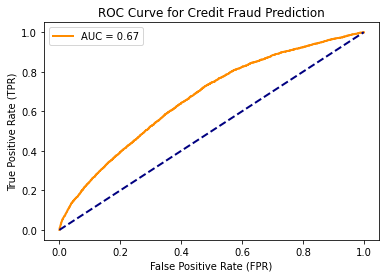

Area under curve (AUC):0.667757591028562


In [272]:
# Random Forest AUC Score
ROC_AUC_score (RF_f1_best_grid)

The random forest model has the greatest F1 and AUC scores so far. Unfortunately, the F1 score is still only 0.18 and the recall and precision scores are still low. Again, we see that there are many false positives from this model. This continues to drive down the precision score. The recall score is also reduced by the false negatives. Again, between false positives and false negatives, false positives would be preferred over the potentially more destructive false negatives. 

In this model, the AUC score is 0.61 indicating that it has a better chance of predicting the target class than producing a false positive prediction. This is a minor improvement from the decision trees model which had an AUC score of 0.59. 

Next we can look at how the random forest model scores the features' importance.

In [273]:
# Calculate the average importance per feature
result = permutation_importance(RF_f1_best_grid, X_test, y_test, n_repeats=100, random_state=0)
importances = result.importances_mean

# Normalize the importances
normalized_importances = importances / importances.sum()


# Put the variable names and their feature importances into a data frame
rf_permute_importances_df = pd.DataFrame({'Variable': X_train.columns,
                               'Importance (%)': (importances*100),
                               'Normalized Importance (%)': (normalized_importances*100)})

rf_permute_importances_df.sort_values(by='Normalized Importance (%)', ascending=False, inplace=True, ignore_index=True)

rf_permute_importances_df

,Variable,Importance (%),Normalized Importance (%)
0,NWCG_CAUSE_CLASSIFICATION,2.647858,29.886121
1,NWCG_GENERAL_CAUSE,2.110780,23.824175
2,FIRE_YEAR,0.683134,7.710468
3,CIMIS Region,0.452530,5.107666
4,Avg Air Temp (C),0.447793,5.054193
5,DISCOVERY_DOY,0.362635,4.093022
6,HmsLatitude,0.356307,4.021602
7,Elevation,0.342355,3.864127
8,Stn Id,0.341305,3.852273
9,HmsLongitude,0.271218,3.061206


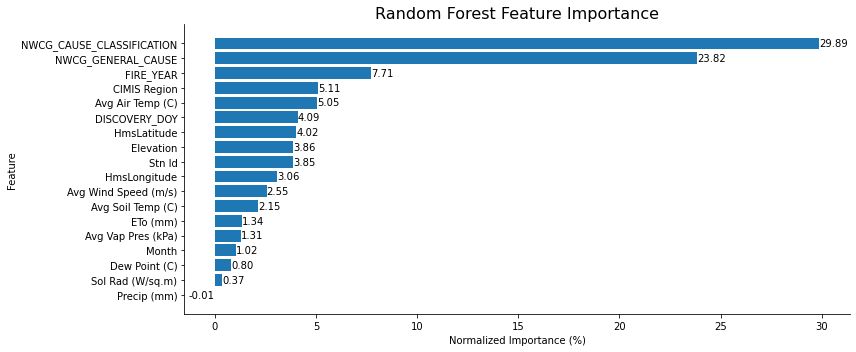

In [437]:
# Plot the Permutation Feature Importance
fig, ax = plt.subplots(figsize=(12,5))

hbars = ax.barh(rf_permute_importances_df['Variable'], rf_permute_importances_df['Normalized Importance (%)'], align='center')
plt.title('Random Forest Feature Importance', fontsize=16)
plt.ylabel('Feature')
plt.xlabel('Normalized Importance (%)')
ax.bar_label(hbars, fmt='%.2f') # Label with specially formatted floats

plt.gca().invert_yaxis()
sns.despine()
plt.tight_layout()
plt.show()

Again we see that out of the available features, the causes of the fire are the best predictor for large forest fires. The general cause and the cause classification have a normalized importance greater than 20% each. This time, we see that the forest fires are also predicted by the `FIRE_YEAR`. In the time series model, the effect of the year was not clear, but the wildfires did seem to follow a cyclic pattern. The day of the year, `DISCOVERY DOY` is also a good predictor for large fires. 

In terms of weather, most features are have minor importance in this model. Only the `Avg Air Temp (C)` has a normalized importance greater than 5% within this model. Other weather features are out of the top 10 featuers in terms of normalized importance. `Precipitation` does not predict for the large fires well in this model. This could because California has been in a drought and precipitation is limited. Recall that the precipitation distribution clusters around 0 mm. 

Geographically, it looks like large fires are more prevalent in certain `CIMIS Regions` of California. Other geographical features are found in the top 10 of normalized importance. This include the `Longitude`, `Latitude` and the `Elevation`.

As we saw with the time series EDA, the date is also indicative of large fires. `Month` and `DISCOVERY DOY` (date of the year that the fire started) are also in the top 10 predictors. Interestingly, the weather features, such as the `solar radiation`, `precipitation` and `average soil temperates` are not strong predictors for large fires. 

In this random forest model, the recall score is lower than the 'Logistic Regression & PCA' and 'Decision trees' models. It can be worth exploring how the model changes based on the threshold. 

In [294]:
# Let's gather all the probabilties from our test set. 
probabilities = RF_f1_grid.predict_proba(X_test)
# note rounded probabilities
prob_df = pd.DataFrame(np.round(probabilities,4), columns=['probability of being class 0', 'probability of being class 1'])
y_proba = probabilities[:, 1]

# Calculate the predicted target classification
y_pred = np.where(y_proba > 0.5, 1, 0)

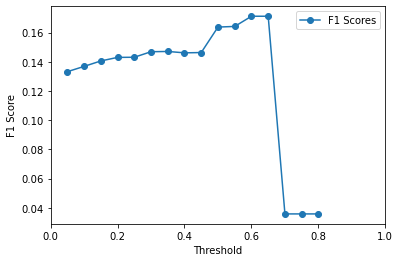

In [408]:
# Vary thresholds by 0.05 from 0.05 to 0.95
thresholds = np.arange(0.05, 1, 0.05)

f1_score_list = []
precisions = []
recalls = []
roc_auc_list = []

for threshold in thresholds:

    # Apply threshold
    y_threshold = np.where(y_proba > threshold, 1, 0)
    y_threshold = pd.Series(y_threshold)
    
    # Calculate precision and recall
    precision = precision_score(y_test, y_threshold)
    recall = recall_score(y_test, y_threshold)
    f1_scores = ((2*precision*recall) / (recall + precision))
    roc_auc = roc_auc_score(y_test, y_threshold)
    
    # Append to list
    precisions.append(precision)
    recalls.append(recall)
    f1_score_list.append(f1_scores)
    roc_auc_list.append(roc_auc)

# Visualize the result
plt.figure()
plt.plot(thresholds, f1_score_list, label='F1 Scores', marker='o')
plt.xlim(0, 1)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [410]:
# data frame to track the model's scores
df_RF_F1_scores = pd.DataFrame({
                        "Threshold": thresholds,
                        "F1 Score": f1_score_list,
                        "Precision": precisions,        
                        "Recall": recalls,
                        "AUC Score": roc_auc_list  
                        })
                                        
df_RF_F1_scores

,Threshold,F1 Score,Precision,Recall,AUC Score
0,0.05,0.133223,0.071500,0.974280,0.519540
1,0.10,0.136859,0.073738,0.950418,0.533974
2,0.15,0.140585,0.076115,0.918810,0.547226
3,0.20,0.143026,0.077689,0.899597,0.555085
4,0.25,0.143127,0.077809,0.891540,0.555248
5,0.30,0.146910,0.080516,0.837620,0.565281
6,0.35,0.147103,0.080655,0.835141,0.565748
7,0.40,0.146144,0.080308,0.810970,0.562241
8,0.45,0.146352,0.080443,0.810040,0.562796
9,0.50,0.163815,0.094912,0.597769,0.588208


With a reduced threshold of just 5% to 0.45, the recall score increases from 0.6 to 0.81. If recall were to be the main focus, the reduced threshold may be worth exploring in future models. At a threshold of 0.45, the F1 and precision scores see slight decreases, but this may be worthwhile for a recall score in the 80th percentile. False negatives would be limited and the news of large fires could be trusted at a higher degree. 

The metrics for the random forest model will be stored in the scores dataframe.

In [295]:
# data frame to track the model's scores
df_scores = df_scores.append({
                        "Classification Model": "Random Forest",
                        "F1 Score": round(f1_score(y_test, y_pred), 5),
                        "Recall ": round(recall_score(y_test, y_pred),5),
                        "Precision": round(precision_score(y_test, y_pred),5),
                        "AUC Score": round(roc_auc_score(y_test, y_pred),5)},
                        ignore_index = True)
                                        
df_scores

,Classification Model,F1 Score,Recall,Precision,AUC Score
0,Logistic Regression,0.15438,0.55438,0.08967,0.56920
1,Logistic Regression & PCA,0.14281,0.65603,0.08013,0.54966
2,Decision Trees,0.16381,0.59777,0.09491,0.58821
3,Random Forest,0.18489,0.56430,0.11056,0.61437


## Model 5: XGBoost
Boosting works in a similar fashion as random forests. Instead of training independent models in random forests, models are trained sequentially to learn from previous models. XGBoost uses regularization to penalize extreme coefficients to produce a more generalized model. 

We will being by using a randomized search and cross validation to determine an approximate range for the hyperparameters. This will be followed by a grid search to fine tune the hyperparameters. XGboost will optimize the following hyperparameters:
- Max depth: Similar to the random forests and decision trees, this limits how many features the model may split on
- Minimum Child Weight: Corresponds to the number of samples required to create a new node. Smaller weights would mean that fewer sample are required to split and would lead to overfitting.


**Note: Fitting the XGBoost Pipeline takes a long run time. To save time, the fitted model was pickled and loaded. If the model needs to be refitted to a new dataset, set the `XG_f1_grid_flag` to 0.**

In [412]:
# To load a fitted model set `XG_f1_grid_flag` to 1.
# If the model needs to be refitted, set `XG_f1_grid_flag` to 0.

XG_f1_grid_flag = 1

# Load a fitted model.
if XG_f1_grid_flag == 1:
    XG_f1_grid = joblib.load("XG_f1_grid.pkl")
    
# Refitting the model
else:
    # Setting the Random Forest Pipeline
    XG_pipeline = ILPipeline(steps = [['smote', SMOTENC(random_state=1, categorical_features=cat_cols_index)],
                                ['col_transform', cat_process],
                                ['scaler', num_process],
                                ['model', XGBClassifier(n_estimators = 100)]])
    
    # Setting the parameters for the Random Forest Pipeline
    depths = list(range(1, 20, 2))
    weights = list(range(10, 50, 5))

    param_grid = [{
            'model': [XGBClassifier()],
            'model__max_depth': depths,
            'model__min_child_weight': weights,
    }]

    XG_f1_grid = RandomizedSearchCV(XG_pipeline, param_grid, n_iter=20, cv=3, scoring='f1', n_jobs = -1, random_state=1)

    # Fit grid onto training set
    XG_f1_grid.fit(X_train, y_train) 
    
    # Save the fitted logistic regression model as a .pkl file for later access. 
    joblib.dump(XG_f1_grid, "XG_f1_grid.pkl")

In [413]:
XG_f1_grid.best_params_

{'model__min_child_weight': 20,
 'model__max_depth': 1,
 'model': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=1,
               min_child_weight=20, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None)}

From the randomized search, the optimal model has a  and a minimum child weight of 20. Next we can a grid search to fine tune the max depth in this model. The max depth of 1 will be maintained since it is already at the lower limit.

**Note: Fitting the fine tuned XGBoost Pipeline takes a long run time. To save time, the fitted model was pickled and loaded. If the model needs to be refitted to a new dataset, set the `XG_f1_best_grid_flag` to 0.**

In [414]:
# To load a fitted model set `XG_f1_best_grid_flag` to 1.
# If the model needs to be refitted, set `XG_f1_best_grid_flag` to 0.

XG_f1_best_grid_flag = 1

# Load a fitted model.
if XG_f1_best_grid_flag == 1:
    XG_f1_best_grid = joblib.load("XG_f1_best_grid.pkl")
    
# Refitting the model
else:
    # Setting the Random Forest Pipeline
    XG_pipeline = ILPipeline(steps = [['smote', SMOTENC(random_state=1, categorical_features=cat_cols_index)],
                                ['col_transform', cat_process],
                                ['scaler', num_process],
                                ['model', XGBClassifier(n_estimators = 100)]])
    
    # Setting the parameters for the Random Forest Pipeline
    depths = list(range(1, 5, 1))
    weights = list(range(15, 25, 2))


    param_grid = [{
            'model': [XGBClassifier()],
            'model__max_depth': depths,
            'model__min_child_weight': weights,
    }]

    XG_f1_best_grid = GridSearchCV(XG_pipeline, param_grid, cv=3, scoring='f1', n_jobs = -1)

    # Fit grid onto training set
    XG_f1_best_grid.fit(X_train, y_train) 
    
    # Save the fitted logistic regression model as a .pkl file for later access. 
    joblib.dump(XG_f1_best_grid, "XG_f1_best_grid.pkl")

In [415]:
XG_f1_best_grid.best_params_

{'model': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=1,
               min_child_weight=15, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=None, subsample=None, tree_method=None,
               validate_parameters=None, verbosity=None),
 'model__max_depth': 1,
 'model__min_child_weight': 15}

From the grid search, the optimal model has a maximum depth of 1 with a minimum child weight of 15. Let's compare the train and test sets before evaluating the XGBoost model. 

In [416]:
# Print F1 scores for the train and test set
print(F"Train set F1 score: {XG_f1_best_grid.score(X_train, y_train)}") 
print(F"Test set F1 score: {XG_f1_best_grid.score(X_test, y_test)}") 

Train set F1 score: 0.1729437666854572
Test set F1 score: 0.17214264462107368


The F1 scores are similar in the train and test sets. It doesn't look like the model is overfitting the training data. 

In [281]:
# XGBoost classification report
class_report(XG_f1_best_grid)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     43657
           1       0.20      0.11      0.14      3227

    accuracy                           0.91     46884
   macro avg       0.57      0.54      0.55     46884
weighted avg       0.89      0.91      0.90     46884



In [282]:
# XGBoost confusion matrix
confusion_matrix_generator(XG_f1_best_grid)

,Predicted 0,Predicted 1,Sum of Actuals
Actual 0,42199,1458,43657
Actual 1,2870,357,3227
Sum of Predictions,45069,1815,46884


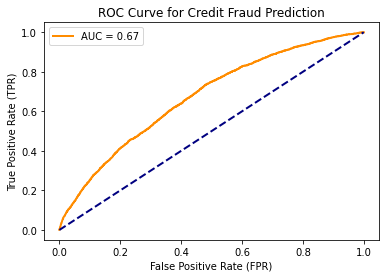

Area under curve (AUC):0.6728939599217749


In [283]:
# XGBoost AUC score and ROC curve
ROC_AUC_score(XG_f1_best_grid)

The XGBoost is not optimizing the F1 score well. The F1, recall and precision are all less than 0.2. The model fails to predict the true positives, instead labeling the large fires as small. As a result the recall score is much lower compared to other models at 0.11. This time, the precision is small due to the model's weakness in predicting true positives rather than an excess of false positives. Finally, the AUC score is the highest out of all model types at 0.67. With a low recall and precision and an inability to classify the taret class, a model with high AUC may not be useful. 

We can take a look at the features to see how they impact the model's predictions.

In [284]:
# Calculate the average importance per feature
result = permutation_importance(XG_f1_best_grid, X_test, y_test, n_repeats=100, random_state=0)
importances = result.importances_mean

# Normalize the importances
normalized_importances = importances / importances.sum()


# Put the variable names and their feature importances into a data frame
xg_permute_importances_df = pd.DataFrame({'Variable': X_train.columns,
                               'Importance (%)': (importances*100),
                               'Normalized Importance (%)': (normalized_importances*100)})

xg_permute_importances_df.sort_values(by='Normalized Importance (%)', ascending=False, inplace=True, ignore_index=True)

xg_permute_importances_df

,Variable,Importance (%),Normalized Importance (%)
0,Avg Vap Pres (kPa),4.321478,14.466735
1,Dew Point (C),3.821877,12.794255
2,FIRE_YEAR,3.614771,12.100940
3,Avg Wind Speed (m/s),3.472461,11.624537
4,Sol Rad (W/sq.m),3.020792,10.112514
5,Avg Soil Temp (C),2.785456,9.324692
6,Avg Air Temp (C),2.269796,7.598450
7,DISCOVERY_DOY,1.818800,6.088681
8,ETo (mm),1.440782,4.823215
9,HmsLatitude,1.340106,4.486186


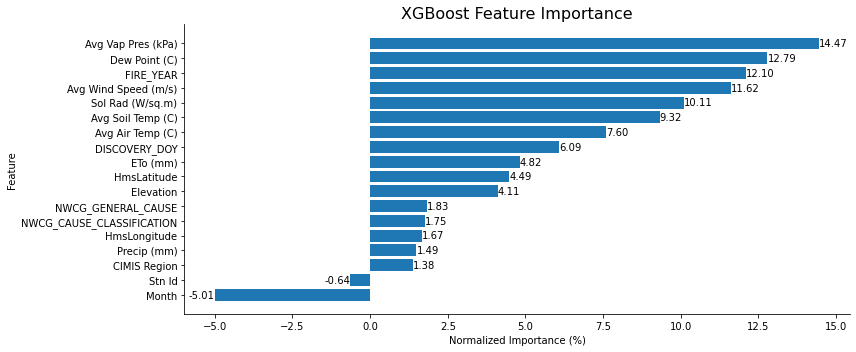

In [438]:
# Plot the Permutation Feature Importance
fig, ax = plt.subplots(figsize=(12,5))

hbars = ax.barh(xg_permute_importances_df['Variable'], xg_permute_importances_df['Normalized Importance (%)'], align='center')
plt.title('XGBoost Feature Importance', fontsize=16)
plt.ylabel('Feature')
plt.xlabel('Normalized Importance (%)')
ax.bar_label(hbars, fmt='%.2f') # Label with specially formatted floats

plt.gca().invert_yaxis()
sns.despine()
plt.tight_layout()
plt.show()


We see that the top features in the XGBoost model are weather related, something that we haven't seen in previous models. Previous models had geographic features as their most important features. This included the `longitude`, `latitude` and the `CIMIS Region`. The causes of large fires were also more important in previous models. In the XGBoost mode, the `NWCG_GENERAL CAUSE` and the `NWCG_CAUSE_CLASSIFICATION` are out of the top 10 most important features. 

In general, as the XGBoost model is poor at predicting the positive target class, this feature importance graph is not particularly reliable. 

The metric scores for the XGboost model will be added to the scores dataframe.

In [296]:
# Let's gather all the probabilties from our test set. 
probabilities = XG_f1_best_grid.predict_proba(X_test)
# note rounded probabilities
prob_df = pd.DataFrame(np.round(probabilities,4), columns=['probability of being class 0', 'probability of being class 1'])
y_proba = probabilities[:, 1]

# Calculate the predicted target classification
y_pred = np.where(y_proba > 0.5, 1, 0)

In [297]:
# data frame to track the model's scores
df_scores = df_scores.append({
                        "Classification Model": "XGBoost",
                        "F1 Score": round(f1_score(y_test, y_pred), 5),
                        "Recall ": round(recall_score(y_test, y_pred),5),
                        "Precision": round(precision_score(y_test, y_pred),5),
                        "AUC Score": round(roc_auc_score(y_test, y_pred),5)},
                        ignore_index = True)
                                        
df_scores

,Classification Model,F1 Score,Recall,Precision,AUC Score
0,Logistic Regression,0.15438,0.55438,0.08967,0.56920
1,Logistic Regression & PCA,0.14281,0.65603,0.08013,0.54966
2,Decision Trees,0.16381,0.59777,0.09491,0.58821
3,Random Forest,0.18489,0.56430,0.11056,0.61437
4,XGBoost,0.14161,0.11063,0.19669,0.53862


_____
# Summary 
Overall the machine learning models had difficulty classifying large fires. In a situation where both recall and precision are important, the F1 score never reached a value higher than 0.2. This is partly due to the low precision score. A large number of false positives were present in most models. In regards to recall, the positive class was incorrectly predicted to be in the negative class about 40% of the time. 

## Summary of the best model
**Model with highest F1 score:** <br>
The random forest model had the highest F1 score at 0.18. Meaning the precision and recall score, in combination, were the best out of all the models. The AUC score is also the best out of all the models, indicating that the model is able to distinguish the positive class from the negative classes at a higher rate. In other words, the random forest model detects true positives and true negatives more than false negatives and false positives.

## Summary of Findings
Out of the 5 machine learning models, the random forest model was deemed as the best. The AUC score indicates that it was the best at classifying the positive and negative classes correctly. Here is a summary of some of the findings from the random forest model:
- **Cause of Fire:** The `Cause Classification` and the `General Cause` were the two strongest predictors within this model. Based on the permutation feature calculation, these two features make up more than 50% of the predictive power in this model. Looking at the distribution of the causes for large fires, we see that most fires are started by humans. Specifically, the fires are started by equipment and vehicle use, arson or open burning. Natural causes make up less than 20% of the large fires. Natural causes may be difficult to prevent, but reducing human caused fires should be a first step in preventing wildfires. 
- **Date:** The year is the third strongest predictor for large fires. The initial time series model revealed that there may be a multi-year pattern where large fires are more prevalent every few years. A longer time frame is also needed to confirm whether the fires are getting larger or more prevalent over time. The `Discover day of the year (DOY)` is a moderate predictor for large first. This can also be seen in the time series model, where large fires seem to occur more often in the summer. Although large fires  occur in the winter months, they are less common. What is interesting, is that the random forest model considers `Month` as a weak predictor. 
- **Location:** The `CIMIS Region`, `Longitude`, `Latitude` and `Elevation` are all moderate predictors for large fires using the random trees model. In actuality, the `coordinates` and the `elevation` are properties of the `CIMIS Region`. From the correlation coefficient plot, we see some moderate correlation between these four features. When multi-collinear features are present, the permutation feature calculator divides the normalized importance among the features. The location could potentially be more important than the numbers indicate.
- **Weather:** The `Avg Air Temp (C)` is the strongest predictor out of all the weather features. The `Avg Air Temp (C)` contributes about 5% of the model's predictive power. The other features are weak predictors, with normalized importance values less than 3% each. Precipitation does not have any predictive power in this model. As seen in its feature distribution, the precipitation in California is limited, meaning the variance is small. 


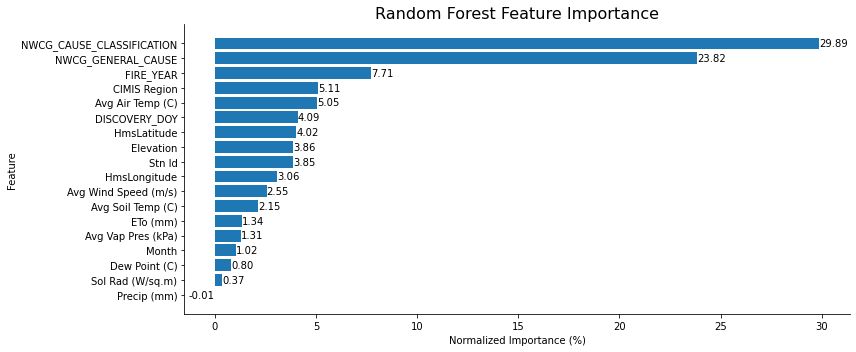

In [443]:
# Plot the Permutation Feature Importance
fig, ax = plt.subplots(figsize=(12,5))

hbars = ax.barh(rf_permute_importances_df['Variable'], rf_permute_importances_df['Normalized Importance (%)'], align='center')
plt.title('Random Forest Feature Importance', fontsize=16)
plt.ylabel('Feature')
plt.xlabel('Normalized Importance (%)')
ax.bar_label(hbars, fmt='%.2f') # Label with specially formatted floats

plt.gca().invert_yaxis()
sns.despine()
plt.tight_layout()

plt.savefig('Random_forest_feature_importance.png', dpi=500)
plt.show()

In [1]:
rf_permute_importances_df

NameError: name 'rf_permute_importances_df' is not defined

_____
# Next Steps
In general, most models do not have strong predictive power for larges fires. This may be due to a number of reasons: 
- Highly imbalanced data: Large wildfires are not common. Even with SMOTE-NC re-sampling, the model may have a bias towards the majority class. As more and more fire data becomes available, it will become more clear what is and is not a feature of a large wildfire.
- Discovering relevant features: Previous wildfire prediction models have included features such as satellite imagery, vegetation density and other weather data. Some have even mapped the location of power lines. There is a plethora of data available that can be used to train machine learning models. New features and updated data can be continuously added to this model. 
- Refine the region: California is a large state. There are many different geographical regions with different weather patterns, vegetation densities, and climates. Instead of predicting forest fires within all of California, regional predictions can be made based on their landscape type. For example, wildfire patterns within forests will be different than grasslands. 

_____
# Conclusion
State and federal governments have poured billions into preventing and fighting forest fires, but wildfire predictions are difficult. The ever changing climate and a multitude of other variables go into predicting the size of a wildfire. Here we have focused on using weather and climate features to build the machine learning model. Incorporating the abundance of geographic and satellite data will become necessary in building future models that predict forest fires in California and around the world. 

**Project:** Predicting California's Wildfire</br>
**Current Notebook:** Capstone 2 - Modeling </br>
**Previous Notebook:** Capstone 1 - Data Wrangling</br>